In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Billionaires Statistics Dataset.csv')

In [10]:
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [3]:
# Get an overview of the columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [4]:
# Create a copy of the data frame to work on
df_copy = df.copy()

In [6]:
# Delete unnecessary columns for the data analysis
df_copy = df_copy.drop(['latitude_country','longitude_country'], axis=1)

In [8]:
# Let's get an overview of the countries with most billionaires
bill_counts = df_copy['country'].value_counts()
bill_counts

country
United States           754
China                   523
India                   157
Germany                 102
United Kingdom           82
                       ... 
Portugal                  1
Georgia                   1
Eswatini (Swaziland)      1
Uzbekistan                1
Armenia                   1
Name: count, Length: 78, dtype: int64

In [9]:
# Let's check how many countries we have with billionaires
country_unique = df_copy['country'].unique()
country_unique

array(['France', 'United States', 'Mexico', 'India', 'Spain', 'China',
       'Canada', 'Germany', 'Switzerland', 'Belgium', 'Hong Kong',
       'Austria', 'Japan', 'United Kingdom', 'Australia', 'Indonesia',
       'United Arab Emirates', 'Russia', 'Chile', 'Monaco',
       'Czech Republic', 'Sweden', nan, 'Thailand', 'Uzbekistan',
       'Singapore', 'Nigeria', 'Israel', 'Italy', 'South Africa',
       'Brazil', 'Malaysia', 'South Korea', 'New Zealand', 'Philippines',
       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Eswatini (Swaziland)',
       'Colombia', 'Netherlands', 'Poland', 'Bahamas', 'Ukraine',
       'Cayman Islands', 'Greece', 'Turkey', 'Argentina', 'Georgia',
       'Portugal', 'Kazakhstan', 'Algeria', 'Vietnam', 'Latvia',
       'Finland', 'Bermuda', 'Luxembourg', 'British Virgin Islands',
       'Cambodia', 'Lebanon', 'Oman', 'Ireland', 'Cyprus', 'Guernsey',
       'Liechtenstein', 'Turks and Caicos Islands', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Mo

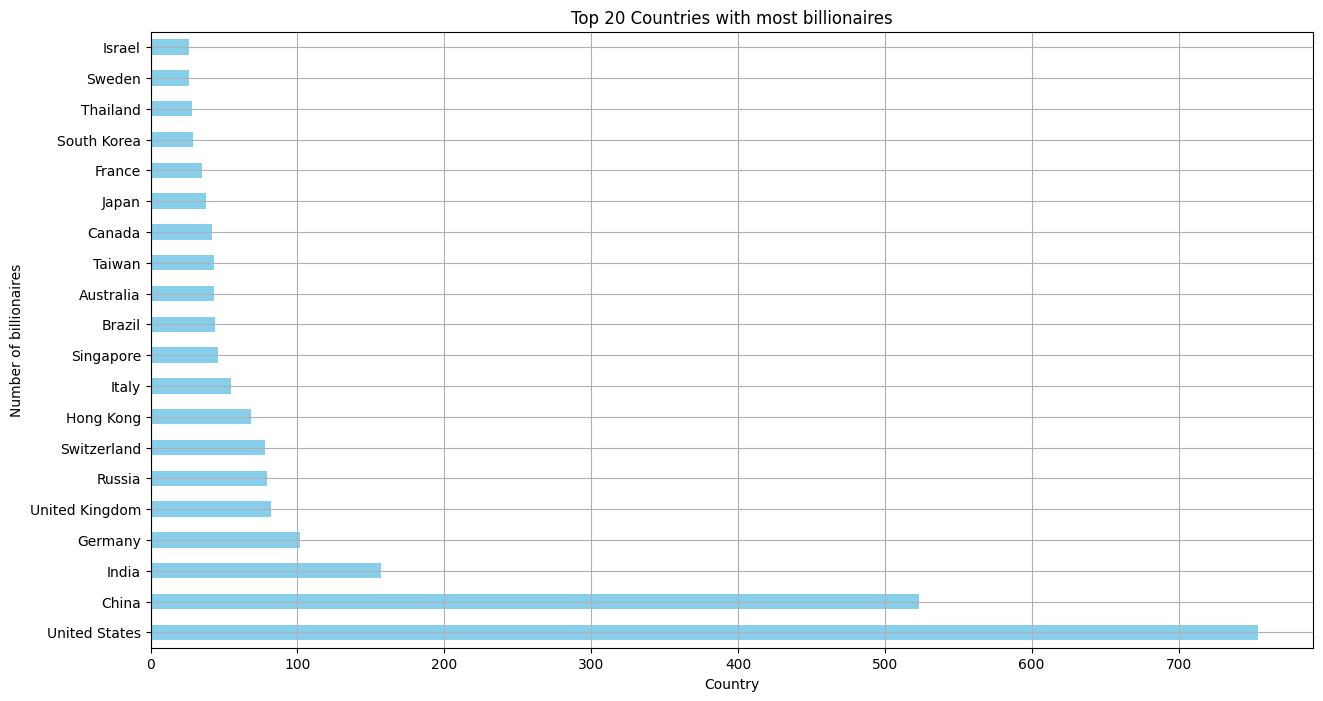

In [11]:
# A bar chart can give a better understanding of the nr. of billionaires form each country
plt.figure(figsize=(15,8))

counts[:20].plot(kind='barh', grid=True, color='skyblue')

plt.title('Top 20 Countries with most billionaires')
plt.xlabel('Country')
plt.ylabel('Number of billionaires');

In [12]:
# Retrieving the population of the top 20 coiuntries with most billionaires to check the ratio of billionaires and population
population = pd.Series([340530035, 1425526510, 1432464645, 83282235, 67802773, 144300884, 8812739, 7493100, 58819826, 6025870, 216782000,26516058,23931261,38877610,123097501,64793701,51771572,71826334,10630312,9214976])
population.index = ['United States', 'China', 'India', 'Germany', 'United Kingdom', 'Russia', 'Switzerland', 'Hong Kong', 'Italy', 'Singapore', 'Brazil', 'Australia','Taiwan','Canada','Japan','France','South Korea','Thailand','Sweden','Israel']

### It looks like the United States have the most billionaires, but let's see which is the country with the highest rate of becoming one

In [13]:
population

United States      340530035
China             1425526510
India             1432464645
Germany             83282235
United Kingdom      67802773
Russia             144300884
Switzerland          8812739
Hong Kong            7493100
Italy               58819826
Singapore            6025870
Brazil             216782000
Australia           26516058
Taiwan              23931261
Canada              38877610
Japan              123097501
France              64793701
South Korea         51771572
Thailand            71826334
Sweden              10630312
Israel               9214976
dtype: int64

In [14]:
ratio = (counts[:20] / population) * 100

In [15]:
ratio

country
United States     0.000221
China             0.000037
India             0.000011
Germany           0.000122
United Kingdom    0.000121
Russia            0.000055
Switzerland       0.000885
Hong Kong         0.000908
Italy             0.000094
Singapore         0.000763
Brazil            0.000020
Australia         0.000162
Taiwan            0.000180
Canada            0.000108
Japan             0.000031
France            0.000054
South Korea       0.000056
Thailand          0.000039
Sweden            0.000245
Israel            0.000282
dtype: float64

In [18]:
# Let's make it in descending order
ratio = ratio.sort_values(ascending=False)

In [19]:
ratio

country
Hong Kong         0.000908
Switzerland       0.000885
Singapore         0.000763
Israel            0.000282
Sweden            0.000245
United States     0.000221
Taiwan            0.000180
Australia         0.000162
Germany           0.000122
United Kingdom    0.000121
Canada            0.000108
Italy             0.000094
South Korea       0.000056
Russia            0.000055
France            0.000054
Thailand          0.000039
China             0.000037
Japan             0.000031
Brazil            0.000020
India             0.000011
dtype: float64

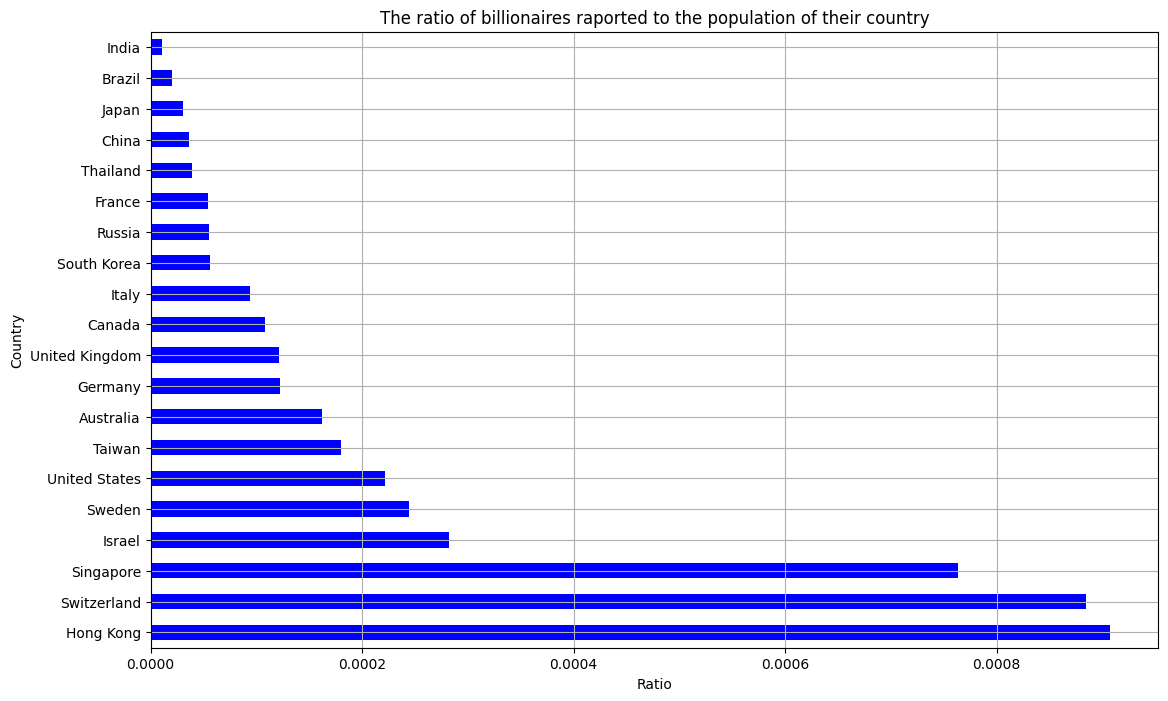

In [41]:
# A bar graph should give a better idea
plt.figure(figsize=(13, 8))

ratio.plot(kind='barh', grid=True, color='blue')

plt.title('The ratio of billionaires raported to the population of their country')
plt.xlabel('Ratio')
plt.ylabel('Country')

plt.show()

### So if you're looking to become a _billionaire_, your chances are the highest in **Hong Kong**, **Switzerland** and **Singapore**